In [1]:
import pandas as pd
import numpy as np
from operator import itemgetter
import random
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def week(i):
  switcher={
          'Iris-setosa': 0,
          'Iris-versicolor': 1,
          'Iris-virginica': 2
        }
  return switcher.get(i)

In [3]:
import pandas as pd

def read_data():
    IRIS_TRAIN_URL = 'iris_training.csv'
    IRIS_TEST_URL = 'iris_test.csv'

    names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

    train = pd.read_csv(IRIS_TRAIN_URL, names=names, skiprows=1)
    test = pd.read_csv(IRIS_TEST_URL, names=names, skiprows=1)

    x_train = train.drop('species', axis=1)
    x_test = test.drop('species', axis=1)

    y_train = train.species
    y_test = test.species

    for i in range(0, 3):
        y_train = y_train.replace(i, i - 1)
        y_test = y_test.replace(i, i - 1)

    return x_train, x_test, y_train, y_test


In [4]:
read_data()

(     sepal-length  sepal-width  petal-length  petal-width
 0             6.4          2.8           5.6          2.2
 1             5.0          2.3           3.3          1.0
 2             4.9          2.5           4.5          1.7
 3             4.9          3.1           1.5          0.1
 4             5.7          3.8           1.7          0.3
 ..            ...          ...           ...          ...
 115           5.5          2.6           4.4          1.2
 116           5.7          3.0           4.2          1.2
 117           4.4          2.9           1.4          0.2
 118           4.8          3.0           1.4          0.1
 119           5.5          2.4           3.7          1.0
 
 [120 rows x 4 columns],
     sepal-length  sepal-width  petal-length  petal-width
 0            5.9          3.0           4.2          1.5
 1            6.9          3.1           5.4          2.1
 2            5.1          3.3           1.7          0.5
 3            6.0          3.4   

In [5]:
import numpy as np

def pre_processing(x_train, x_test, y_train, y_test):
    x_train_list = np.array(x_train).tolist()
    x_test_list = np.array(x_test).tolist()

    y_train_one_list = np.array(y_train).tolist()
    y_train_list = [[i] for i in y_train_one_list]

    y_test_one_list = np.array(y_test).tolist()
    y_test_list = [[i] for i in y_test_one_list]

    iris_train_data = list(zip(x_train_list, y_train_list))
    iris_test_data = list(zip(x_test_list, y_test_list))

    iris_train_data = [list(item) for item in iris_train_data]
    iris_test_data = [list(item) for item in iris_test_data]

    return iris_train_data, iris_test_data


In [6]:
x_train = read_data()[0]
x_test = read_data()[1]
y_train = read_data()[2]
y_test = read_data()[3]
pre_processing(x_train, x_test, y_train,y_test)

([[[6.4, 2.8, 5.6, 2.2], [1]],
  [[5.0, 2.3, 3.3, 1.0], [0]],
  [[4.9, 2.5, 4.5, 1.7], [1]],
  [[4.9, 3.1, 1.5, 0.1], [-1]],
  [[5.7, 3.8, 1.7, 0.3], [-1]],
  [[4.4, 3.2, 1.3, 0.2], [-1]],
  [[5.4, 3.4, 1.5, 0.4], [-1]],
  [[6.9, 3.1, 5.1, 2.3], [1]],
  [[6.7, 3.1, 4.4, 1.4], [0]],
  [[5.1, 3.7, 1.5, 0.4], [-1]],
  [[5.2, 2.7, 3.9, 1.4], [0]],
  [[6.9, 3.1, 4.9, 1.5], [0]],
  [[5.8, 4.0, 1.2, 0.2], [-1]],
  [[5.4, 3.9, 1.7, 0.4], [-1]],
  [[7.7, 3.8, 6.7, 2.2], [1]],
  [[6.3, 3.3, 4.7, 1.6], [0]],
  [[6.8, 3.2, 5.9, 2.3], [1]],
  [[7.6, 3.0, 6.6, 2.1], [1]],
  [[6.4, 3.2, 5.3, 2.3], [1]],
  [[5.7, 4.4, 1.5, 0.4], [-1]],
  [[6.7, 3.3, 5.7, 2.1], [1]],
  [[6.4, 2.8, 5.6, 2.1], [1]],
  [[5.4, 3.9, 1.3, 0.4], [-1]],
  [[6.1, 2.6, 5.6, 1.4], [1]],
  [[7.2, 3.0, 5.8, 1.6], [1]],
  [[5.2, 3.5, 1.5, 0.2], [-1]],
  [[5.8, 2.6, 4.0, 1.2], [0]],
  [[5.9, 3.0, 5.1, 1.8], [1]],
  [[5.4, 3.0, 4.5, 1.5], [0]],
  [[6.7, 3.0, 5.0, 1.7], [0]],
  [[6.3, 2.3, 4.4, 1.3], [0]],
  [[5.1, 2.5, 3.0, 1.1], [0]]

In [7]:
def tanh(x):
    return np.tanh(x)

In [8]:
def tanh_derivate(x):
    return 1.0 - np.tanh(x) * np.tanh(x)

In [9]:
def calculate_fit(loss):
    total = sum(loss)
    fitnesses = []

    for i in range(len(loss)):
        fitnesses.append(loss[i] / total)

    return fitnesses

In [10]:
def pair_pop(iris_data, pop):
    weights, loss = [], []

    for individual_obj in pop:
        weights.append([individual_obj.weights_input, individual_obj.weights_output])

        loss.append(individual_obj.sum_loss(data=iris_data))

    fitnesses = calculate_fit(loss)

    for i in range(int(pop_size)):
        print(str(i).zfill(2), '1/sum(MSEs)', str(loss[i]).rjust(15), str(
            int(loss[i] * graphical_error_scale) * '-').rjust(20), 'fitness'.rjust(12), str(fitnesses[i]).rjust(
            17), str(int(fitnesses[i] * 1000) * '-').rjust(20))

    del pop

    return zip(weights, loss, fitnesses)


In [11]:
def roulette(fitness_scores):
    cumulative_fitness = 0.0
    r = random.random()
    
    for i in range(len(fitness_scores)):
        cumulative_fitness += fitness_scores[i]
        if cumulative_fitness > r:
            return i

In [12]:
def iterate_pop(ranked_pop):
    ranked_weights = [item[0] for item in ranked_pop]
    fitness_scores = [item[-1] for item in ranked_pop]
    new_pop_weight = [eval(repr(x)) for x in ranked_weights[:int(pop_size * 0.15)]]

    while len(new_pop_weight) <= pop_size:
        ch1, ch2 = [], []
        index1 = roulette(fitness_scores)
        index2 = roulette(fitness_scores)

        while index1 == index2:
            index2 = roulette(fitness_scores)

        ch1.extend(eval(repr(ranked_weights[index1])))
        ch2.extend(eval(repr(ranked_weights[index2])))

        if random.random() < crossover_rate:
            ch1, ch2 = crossover(ch1, ch2)

        mutate(ch1)
        mutate(ch2)

        new_pop_weight.append(ch1)
        new_pop_weight.append(ch2)

    return new_pop_weight

In [13]:
def crossover(m1, m2):
    total_weights = (nodes_input * nodes_hidden) + (nodes_hidden * nodes_output)
    r = random.randint(0, total_weights)
    
    output1 = [[[0.0] * nodes_hidden] * nodes_input, [[0.0] * nodes_output] * nodes_hidden]
    output2 = [[[0.0] * nodes_hidden] * nodes_input, [[0.0] * nodes_output] * nodes_hidden]

    for i in range(len(m1)):
        for j in range(len(m1[i])):
            for k in range(len(m1[i][j])):
                if r >= 0:
                    output1[i][j][k] = m1[i][j][k]
                    output2[i][j][k] = m2[i][j][k]
                elif r < 0:
                    output1[i][j][k] = m2[i][j][k]
                    output2[i][j][k] = m1[i][j][k]
                r -= 1
    
    return output1, output2

In [14]:
def mutate(m):
    for i in range(len(m)):
        for j in range(len(m[i])):
            for k in range(len(m[i][j])):
                if random.random() < mutation_rate:
                    m[i][j][k] = random.uniform(-2.0, 2.0)


In [15]:
def rank_pop(new_pop_weight, pop):
    loss, copy = [], []
    pop = [NeuralNetwork(nodes_input, nodes_hidden, nodes_output) for _ in range(pop_size)]
    for i in range(pop_size):
        copy.append(new_pop_weight[i])

    for i in range(pop_size):
        pop[i].assign_weights(new_pop_weight, i)
        pop[i].test_weights(new_pop_weight, i)

    for i in range(pop_size):
        pop[i].test_weights(new_pop_weight, i)

    
    paired_pop = pair_pop(iris_train_data, pop)

    ranked_pop = sorted(paired_pop, key=itemgetter(-1), reverse=True)
    loss = [eval(repr(x[1])) for x in ranked_pop]
    return ranked_pop, eval(repr(ranked_pop[0][1])), float(sum(loss)) / float(len(loss))

In [16]:
def randomize_matrix(matrix, a, b):
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            matrix[i][j] = random.uniform(a, b)

In [17]:
class NeuralNetwork(object):
    def __init__(self, nodes_input, nodes_hidden, nodes_output):
        self.nodes_input = nodes_input
        self.nodes_hidden = nodes_hidden
        self.nodes_output = nodes_output

        self.activations_input = [1.0] * self.nodes_input
        self.activations_hidden = [1.0] * self.nodes_hidden
        self.activations_output = [1.0] * self.nodes_output


        self.weights_input = [[0.0] * self.nodes_hidden for _ in range(self.nodes_input)]
        self.weights_output = [[0.0] * self.nodes_output for _ in range(self.nodes_hidden)]
        randomize_matrix(self.weights_input, -0.1, 0.1)
        randomize_matrix(self.weights_output, -2.0, 2.0)


        self.activation_fun = tanh
        self.activation_fun_deriv = tanh_derivate
      

    def sum_loss(self, data):
        loss = 0.0
        for item in data:
            inputs = item[0]
            targets = item[1]
            self.feed_forward(inputs)
            loss += self.calculate_loss(targets)
        inverr = 1.0 / loss
        return inverr

    def calculate_loss(self, targets):
        loss = 0.0
        for k in range(len(targets)):
            loss += 0.5 * (targets[k] - self.activations_output[k]) ** 2
        return loss

    def feed_forward(self, inputs):
        if len(inputs) != self.nodes_input:
            print('incorrect number of inputs')

        for i in range(self.nodes_input):
            self.activations_input[i] = inputs[i]

        for j in range(self.nodes_hidden):
            self.activations_hidden[j] = self.activation_fun(
                sum([self.activations_input[i] * self.weights_input[i][j] for i in range(self.nodes_input)]))
        for k in range(self.nodes_output):
            self.activations_output[k] = self.activation_fun(
                sum([self.activations_hidden[j] * self.weights_output[j][k] for j in range(self.nodes_hidden)]))
        return self.activations_output

    def assign_weights(self, weights, I):
        io = 0
        for i in range(self.nodes_input):
            for j in range(self.nodes_hidden):
                self.weights_input[i][j] = weights[I][io][i][j]
        io = 1
        for j in range(self.nodes_hidden):
            for k in range(self.nodes_output):
                self.weights_output[j][k] = weights[I][io][j][k]

    def test_weights(self, weights, I):
        same = []
        io = 0
        for i in range(self.nodes_input):
            for j in range(self.nodes_hidden):
                if self.weights_input[i][j] != weights[I][io][i][j]:
                    same.append(('I', i, j, round(self.weights_input[i][j], 2), round(weights[I][io][i][j], 2),
                                 round(self.weights_input[i][j] - weights[I][io][i][j], 2)))

        io = 1
        for j in range(self.nodes_hidden):
            for k in range(self.nodes_output):
                if self.weights_output[j][k] != weights[I][io][j][k]:
                    same.append((('O', j, k), round(self.weights_output[j][k], 2), round(weights[I][io][j][k], 2),
                                 round(self.weights_output[j][k] - weights[I][io][j][k], 2)))
        if same:
            print(same)

    def test(self, data):
        results, targets = [], []
        for d in data:
            inputs = d[0]
            rounded = [round(i) for i in self.feed_forward(inputs)]
            if rounded == d[1]:
                result = '√ Classification Prediction is Correct '
            else:
                result = '× Classification Prediction is Wrong'
            print('{0} {1} {2} {3} {4} {5} {6}'.format(
                'Inputs:', d[0], '-->', str(self.feed_forward(inputs)).rjust(65), 'target classification', d[1],
                result))
            results += self.feed_forward(inputs)
            targets += d[1]
        return results, targets

In [18]:
graphical_error_scale = 300
max_iterations = 100
pop_size = 10
mutation_rate = 0.1
crossover_rate = 0.8
nodes_input, nodes_hidden, nodes_output = 4, 6, 1
x_train, x_test, y_train, y_test = read_data()
iris_train_data, iris_test_data = pre_processing(x_train, x_test, y_train, y_test)

In [19]:
pop = [NeuralNetwork(nodes_input, nodes_hidden, nodes_output) for i in range(pop_size)]

paired_pop = pair_pop(iris_train_data, pop)

ranked_pop = sorted(paired_pop, key=itemgetter(-1), reverse=True)

iters = 0
tops, avgs = [], []

while iters != max_iterations:
    print('Iteration'.rjust(150), iters)
    new_pop_weight = iterate_pop(ranked_pop)
    ranked_pop, toperr, avgerr = rank_pop(new_pop_weight, pop)
    tops.append(toperr)
    avgs.append(avgerr)
    iters += 1


00 1/sum(MSEs) 0.01871818519432693                -----      fitness 0.10800162593996533 ------------------------------------------------------------------------------------------------------------
01 1/sum(MSEs) 0.010343017811262123                  ---      fitness 0.059677940417048964 -----------------------------------------------------------
02 1/sum(MSEs) 0.011282440004298957                  ---      fitness 0.06509829090716036 -----------------------------------------------------------------
03 1/sum(MSEs) 0.02087507278957853               ------      fitness 0.12044660203345518 ------------------------------------------------------------------------------------------------------------------------
04 1/sum(MSEs) 0.010432242589738015                  ---      fitness 0.060192756412803194 ------------------------------------------------------------
05 1/sum(MSEs) 0.010507840998739644                  ---      fitness 0.06062894993294878 -------------------------------------------

00 1/sum(MSEs) 0.03426831550847239           ----------      fitness 0.19300752567518922 -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
01 1/sum(MSEs) 0.020668165747164367               ------      fitness 0.1164081593131894 --------------------------------------------------------------------------------------------------------------------
02 1/sum(MSEs) 0.01718667424012969                -----      fitness 0.0967995485174292 ------------------------------------------------------------------------------------------------
03 1/sum(MSEs) 0.010278816204681287                  ---      fitness 0.05789280427411392 ---------------------------------------------------------
04 1/sum(MSEs) 0.011179309873929047                  ---      fitness 0.06296460463572527 --------------------------------------------------------------
05 1/sum(MSEs) 0.01895043

In [20]:
tester = NeuralNetwork(nodes_input, nodes_hidden, nodes_output)
fittestWeights = [x[0] for x in ranked_pop]
tester.assign_weights(fittestWeights, 0)
results, targets = tester.test(iris_test_data)
x = np.arange(0, 150)

Inputs: [5.9, 3.0, 4.2, 1.5] -->                                              [0.5420525334713999] target classification [0] × Classification Prediction is Wrong
Inputs: [6.9, 3.1, 5.4, 2.1] -->                                              [0.6183699111655532] target classification [1] √ Classification Prediction is Correct 
Inputs: [5.1, 3.3, 1.7, 0.5] -->                                             [-0.5642376877757626] target classification [-1] √ Classification Prediction is Correct 
Inputs: [6.0, 3.4, 4.5, 1.6] -->                                              [0.5567564651374719] target classification [0] × Classification Prediction is Wrong
Inputs: [5.5, 2.5, 4.0, 1.3] -->                                              [0.5141604587045573] target classification [0] × Classification Prediction is Wrong
Inputs: [6.2, 2.9, 4.3, 1.3] -->                                              [0.5491667527641484] target classification [0] × Classification Prediction is Wrong
Inputs: [5.5, 4.2, 1.

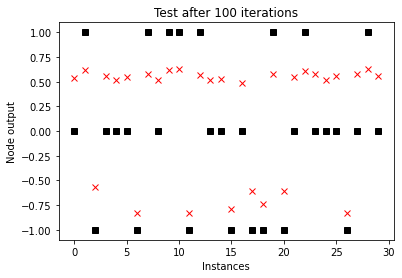

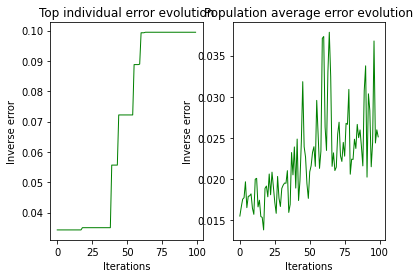

In [21]:
title2 = 'Test after ' + str(iters) + ' iterations'

plt.title(title2)
plt.ylabel('Node output')
plt.xlabel('Instances')
plt.plot(results, 'xr', linewidth=0.5)
plt.plot(targets, 's', color='black', linewidth=3)
plt.annotate(text='Target Values', xy=(110, 0), color='black', family='sans-serif', size='small', weight='bold')
plt.annotate(text='Test Values', xy=(110, 0.5), color='red', family='sans-serif', size='small', weight='bold')

plt.figure(2)

plt.subplot(121)
plt.title('Top individual error evolution')
plt.ylabel('Inverse error')
plt.xlabel('Iterations')
plt.plot(tops, '-g', linewidth=1)

plt.subplot(122)
plt.plot(avgs, '-g', linewidth=1)
plt.title('Population average error evolution')
plt.ylabel('Inverse error')
plt.xlabel('Iterations')

plt.show()